In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#Word Embedding

1) Embedding Layer를 만들어, 임베딩 벡터를 학습

2) Pre-trained Word embedding

In [ ]:
import torch
import torch.nn as nn

In [ ]:
train_data = 'you need to know how to code'
word_set = set(train_data.split()) # 중복을 제거한 단어들의 집합인 단어 집합 생성.
vocab = {word: i+2 for i, word in enumerate(word_set)}  # 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

In [ ]:
# 단어 집합의 크기만큼의 행을 가지는 테이블 생성.
embedding_table = torch.FloatTensor([
                               [ 0.0,  0.0,  0.0],
                               [ 0.0,  0.0,  0.0],
                               [ 0.2,  0.9,  0.3],
                               [ 0.1,  0.5,  0.7],
                               [ 0.2,  0.1,  0.8],
                               [ 0.4,  0.1,  0.1],
                               [ 0.1,  0.8,  0.9],
                               [ 0.6,  0.1,  0.1]])

In [ ]:
embedding_table.shape

In [ ]:
# 임의의 샘플 문장
sample = 'you need to run'.split()
idxes=[]
# 각 단어를 정수로 변환
for word in sample:
  try:
    idxes.append(vocab[word])
  except KeyError: # 단어 집합에 없는 단어일 경우 <unk>로 대체된다.
    idxes.append(vocab['<unk>'])
idxes = torch.LongTensor(idxes)
idxes

In [ ]:
# 룩업 테이블
lookup_result = embedding_table[idxes, :] # 각 정수를 인덱스로 임베딩 테이블에서 값을 가져온다.
print(lookup_result)

## nn.Embedding

- 훈련 데이터 학습을 위한 임베딩층을 만들어 주는 역할
- 입력 시퀀스는 정수로 인코딩 되어야 함

- one hot encoding 형식으로 나타내면 잘 나타낼 수 있을텐데 왜 사용하는지?
> - 단어의 개수가 늘어나게 되면 벡터의 크기가 계속 증가..
> - 단어간 유사성을 파악하기 어려움
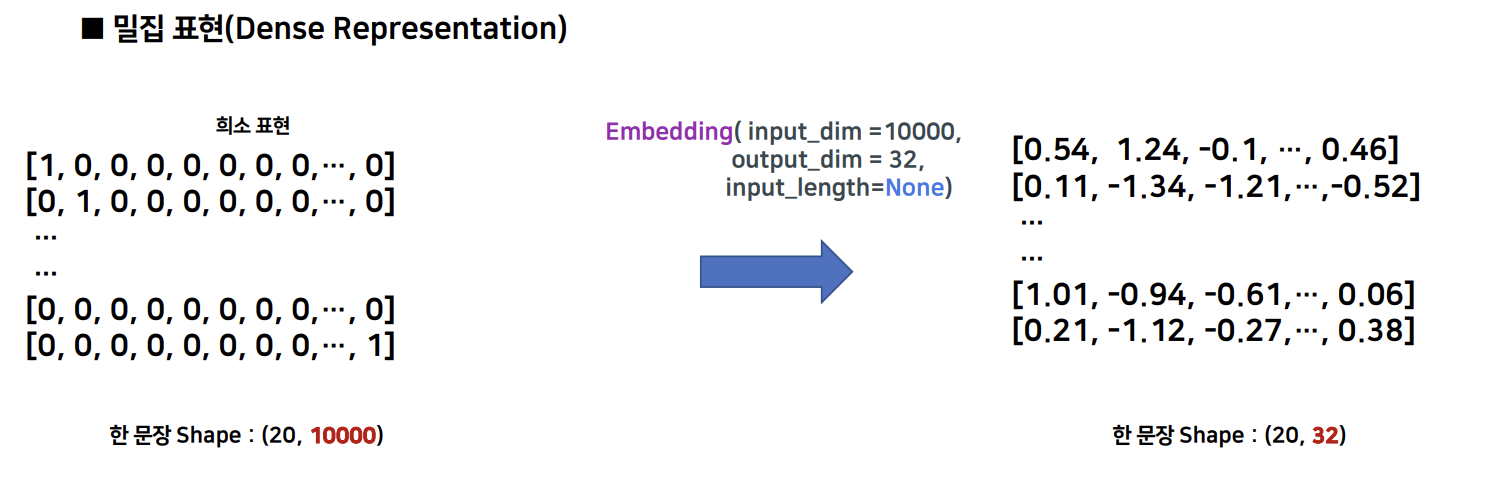

In [ ]:
train_data = 'you need to know how to code'
word_set = set(train_data.split()) # 중복을 제거한 단어들의 집합인 단어 집합 생성.
vocab = {tkn: i+2 for i, tkn in enumerate(word_set)}  # 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab['<unk>'] = 0
vocab['<pad>'] = 1

In [ ]:
embedding_layer = nn.Embedding(num_embeddings = len(vocab), 
                               embedding_dim = 3)

In [ ]:
print(embedding_layer.weight)

## Word2Vec

- Distributed Representation
  - **비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다**
  - **단어의 의미를 여러 차원에다가 분산하여 표현**

- 훈련 데이터가 적다면 파이토치의 nn.Embedding()으로 해당 문제에 충분히 특화된 임베딩 벡터를 만들어내는 것이 쉽지 않음 
- 이 경우, 해당 문제에 특화된 것은 아니지만 보다 일반적이고 보다 많은 훈련 데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용 가능

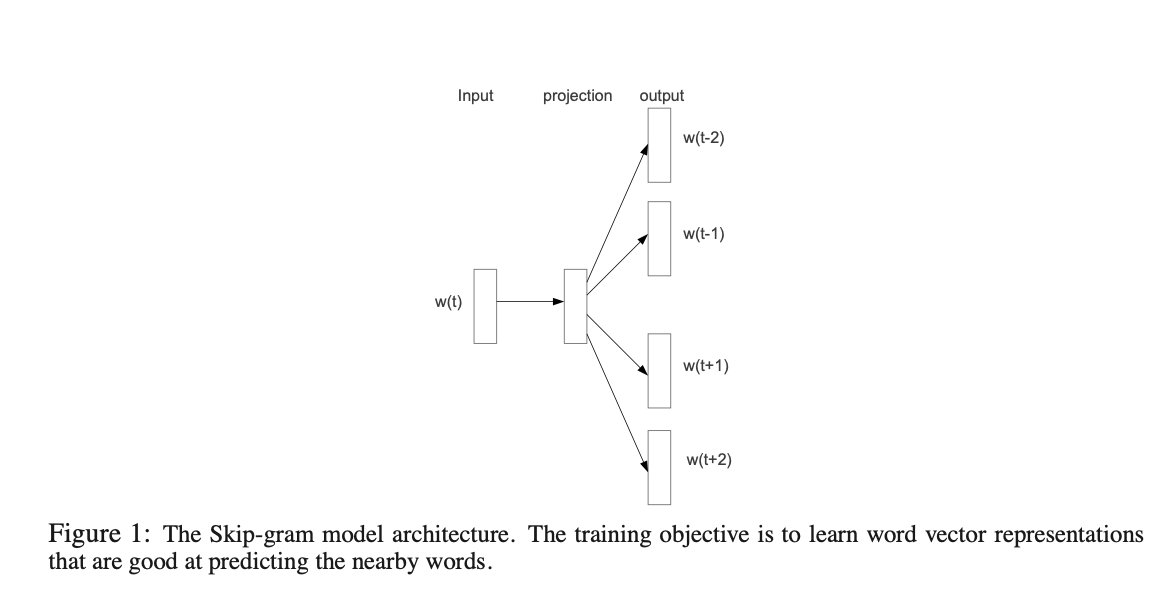


In [ ]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1r8GSa4T9ezqUfwlPMT9WfOMRyTPS-EzB',
                                    dest_path='./wiki.w2v.wv.syn0.npy')
gdd.download_file_from_google_drive(file_id='1u81pn_XjCsBCd0s0PCzm4LpQnTRetD4n',
                                    dest_path='./wiki.w2v.syn1neg.npy')
gdd.download_file_from_google_drive(file_id='1QhRRYAnixo6d6u1KMZ2M_2T1_ynJLyzP',
                                    dest_path='./wiki.w2v')

In [ ]:
import os
import gensim

In [ ]:
drive_path = '/content/'

In [ ]:
model = gensim.models.Word2Vec.load(os.path.join(drive_path, 'wiki.w2v'))

In [ ]:
# 한국 
for t in model.wv.most_similar(positive=['한국']):
    print('%s\t%f' % (t[0], t[1]))

In [ ]:
# 일본+도쿄
for t in model.wv.most_similar(positive=['한국', '서울']):
    print('%s\t%f' % (t[0], t[1]))

In [ ]:
for t in model.wv.most_similar('컴퓨터'):
    print(t[0])

In [ ]:
model.wv.similarity('고양이', '개')

In [ ]:
for t in model.wv.most_similar('고양이'):
    print(t[0])

In [ ]:
model.wv.similarity('고양이', '토끼')

In [ ]:
model.wv.similarity('고양이', '개')

In [ ]:
for t in model.wv.most_similar('오렌지',topn=15):
    print(t[0])

# Embedding Projector 

- https://projector.tensorflow.org/

- 임베딩 프로젝터에서 시각화를 하려면 임베딩 모델에서 별도의 tsv 파일을 생성해야 함

In [ ]:
vocab = model.wv.vocab.keys()
len(vocab)

In [ ]:
visualize_list=[]
word_list=[]
for i,v in enumerate(vocab):
  if i <50:
    visualize_list.append(model.wv[v])
    word_list.append(v)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = 2)
xys = pca.fit_transform(visualize_list)
xs, ys = xys[:,0] , xys[:,1]
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,marker='o')
plt.rc('font', family='NanumBarunGothic')
for i, word in enumerate(word_list):
  plt.annotate(word, xy=(xs[i],ys[i]))
plt.show()

In [ ]:
from gensim.models import KeyedVectors  
model.wv.save_word2vec_format('./vis_w2v')

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input /content/vis_w2v --output /content/vis_w2v